Epoch 1/20


C:\Users\azwan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 - 3s - 39ms/step - accuracy: 0.3968 - loss: 1.8920 - val_accuracy: 0.7380 - val_loss: 1.0448
Epoch 2/20
65/65 - 0s - 5ms/step - accuracy: 0.6498 - loss: 1.1412 - val_accuracy: 0.8515 - val_loss: 0.5948
Epoch 3/20
65/65 - 0s - 4ms/step - accuracy: 0.7431 - loss: 0.8529 - val_accuracy: 0.8865 - val_loss: 0.4243
Epoch 4/20
65/65 - 0s - 4ms/step - accuracy: 0.8091 - loss: 0.5957 - val_accuracy: 0.8908 - val_loss: 0.3115
Epoch 5/20
65/65 - 0s - 4ms/step - accuracy: 0.8320 - loss: 0.5202 - val_accuracy: 0.8952 - val_loss: 0.2617
Epoch 6/20
65/65 - 0s - 4ms/step - accuracy: 0.8528 - loss: 0.4729 - val_accuracy: 0.9432 - val_loss: 0.2175
Epoch 7/20
65/65 - 0s - 4ms/step - accuracy: 0.8684 - loss: 0.4377 - val_accuracy: 0.9476 - val_loss: 0.2324
Epoch 8/20
65/65 - 0s - 4ms/step - accuracy: 0.8825 - loss: 0.3805 - val_accuracy: 0.9520 - val_loss: 0.1869
Epoch 9/20
65/65 - 0s - 4ms/step - accuracy: 0.8898 - loss: 0.3395 - val_accuracy: 0.9607 - val_loss: 0.1538
Epoch 10/20
65/65 - 0s - 4ms/

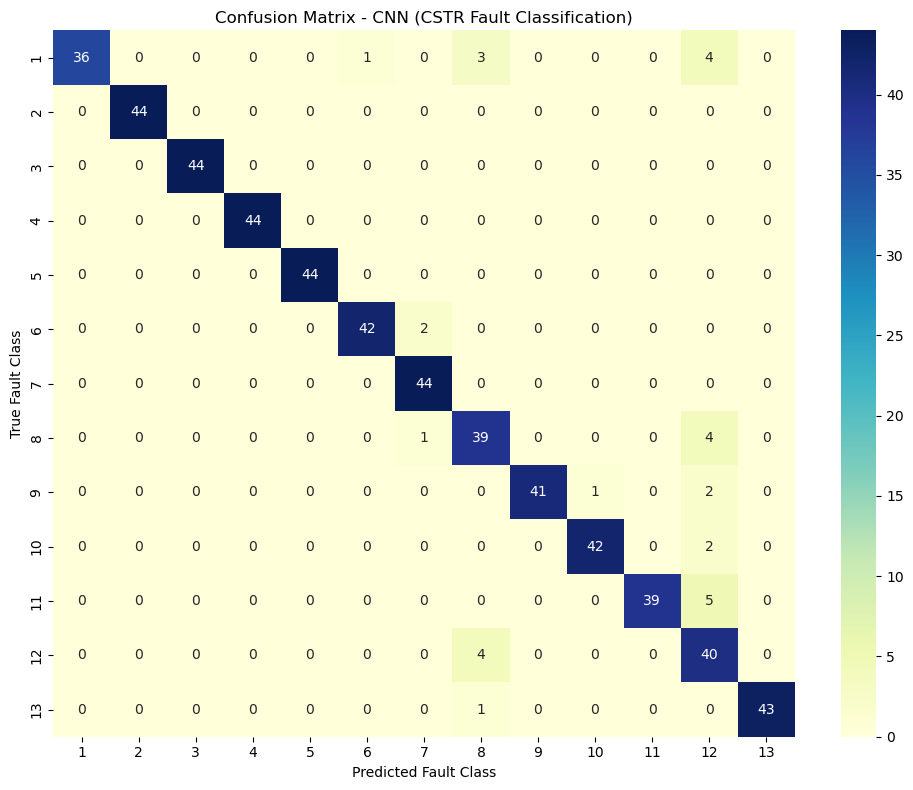

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load dataset
df = pd.read_csv('cstr_data.csv')
X = df.iloc[:, :-4].values
y = df.iloc[:, -4].values

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reshape for CNN: (samples, timesteps, features_per_step)
timesteps = 10
features_per_step = X_scaled.shape[1] // timesteps
X_reshaped = X_scaled.reshape(-1, timesteps, features_per_step)

# 4. Encode labels
num_classes = len(np.unique(y))
y_adjusted = y - 1  # If labels start from 1
y_cat = to_categorical(y_adjusted, num_classes)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_cat, test_size=0.2, stratify=y, random_state=42
)

# 6. Define CNN model
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(timesteps, features_per_step)),
    MaxPooling1D(2),
    Dropout(0.3),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=2)

# 8. Predict & evaluate
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) + 1
y_true = np.argmax(y_test, axis=1) + 1
print("Classification Report (CNN):\n")
print(classification_report(y_true, y_pred, digits=4))

# 9. Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=range(1, num_classes+1), yticklabels=range(1, num_classes+1))
plt.xlabel("Predicted Fault Class")
plt.ylabel("True Fault Class")
plt.title("Confusion Matrix - CNN (CSTR Fault Classification)")
plt.tight_layout()
plt.show()
